<a href="https://colab.research.google.com/github/elenik98/discretemath/blob/main/Mid2TH_S24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid2TH

This is a Python 3 notebook, created on Google Colab, which you are encouraged to experiment with.  It has questions that appear as [Mid2TH in an Online Assignment on Gradescope](https://www.gradescope.com/courses/702753/assignments/4242892).  Although this introduces advanced material for COMP 550 and programming interviews, my objective is primarily these basics:
* practice counting: Q2, Q3
* make bijections that prove the sum and product rules for counting: Q4
* meet big-$O$ and big-$\Theta$ notation, which define sets of functions: Q5
* use the negation to show that given functions are not in a set: Q6
* a relation to compare function growth rates (for program timing): Q7

As usual, you are encouraged to collaborate, use office hours, and other sources (but be skeptical, much of what you find on the web is less precise than it should be, especially on big-$O$ notation.)  As always, you must **turn in your own writing/typing** and good scholarship requires that you **cite your sources** and **credit your collaborators**.

## Using this notebook

You don't have to know much about Python to use this notebook. (Two things that will show up later: integers can have arbitrary precision.  Integers and strings are immutable: to change them you have to make a new one.)  You will want to know about **Playground mode**, which will allow you to run the notebook in your own workspace by clicking the play buttons or using the Runtime menu.  There is also a table of contents button on the upper left (below the CO logo) that allows you to navigate this document easily and find the questions.  **Click on ‣ (triangle bullets)** or *```# cells hidden```* to expand hidden cells.


### Here are links to brief tutorials
* Colab: https://colab.research.google.com/notebooks/intro.ipynb
* Python: https://learnxinyminutes.com/docs/python/

### Timing function ```tester(fcn,X,z, plotflag=True)```
You can ignore this; it will be used below.
This times a given function fcn(k) with inputs k from set X.  It will run each k z times and return an average time.  It can optionally print the time for each k and plot the times on both linear and log scales.  

In [ ]:
import timeit
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def tester(fcn,X,z, plotflag=True):
    '''Times fcn(k) for each input k from X.  Each k is run z times. Can print & plot timing results'''
    #plotflag and print('    X: ', X)
    output = []
    for k in X:
        if isinstance(k,str):
          s1 = fcn+"('"+str(k)+"')"
        else:
          s1 = fcn+"("+str(k)+")"
        s2 = "from __main__ import "+fcn
        time = timeit.timeit(s1, setup = s2, number = z)
        output.append(time/z)

    if plotflag:
      print(fcn + ': ', output)
      fig, axs = plt.subplots(2, 1, sharex='col', sharey='row')
      fig.subplots_adjust(hspace=0)
      fig.suptitle('Timing ' + fcn + ' with log y and linear y scales')
      axis_scale = ('linear','log')
      for i in range(2):
          if isinstance(X[0],str):
            axs[i].plot(list(map(len,X)),output,'.-')
          else:
            axs[i].plot(X,output,'.-')
          axs[i].set_yscale(axis_scale[1-i])
      axs[1].set_xlabel('input size (n)')
      axs[1].set_ylabel('time (sec)')
      plt.show()
    return output,X

# Operation Counting
Let's start with a few short programs where you are asked to count the possible outputs or operations.  The result should be a function of $n$, the input value.

If you can identify the set of values for loop indices, you can often apply the sum and/or product rule to make counting easier.  


## Q2: Nested for loops
The functions in Q2 & Q3 count something that depends on their input parameter $n$.  The comment string tells you what they count; the questions ask for the precise formula as a function of $n$.  I'll give you the first answer:  
Q2.1: As a function of $n$, what is returned from one_loop(n)?  
**Answer:** n.  To see why this is the answer, you'll need to click on  *```1 cell hidden```* just below.  
Q2.2: As a function of $n$, what is returned from nested2(n)?  
Q2.3: As a function of $n$, what is returned from nested_ij(n)?  
Q2.4: As a function of $n$, what is returned from nested_ijk(n)?  
Q2.5: As a function of $n$, what is returned from nested3(n)?

*Hint: consider the set of pairs or triples that can be assigned to the loop variables; find a way to count elements of that set.*

In [ ]:
def one_loop(n):
    ''' One loop, from 0 to n-1 '''
    count = 0
    for i in range(n):
        count += 1
    return count

def nested2(n):
    ''' Two nested loops from 0 to n-1 '''
    count = 0
    for i in range(n):
        for j in range(n):
            count += 1
    return count

def nested_ij(n):
    ''' Nested loops: outer i from 0 to n-1; inner from 0 to i-1 '''
    count = 0
    for i in range(n):
        for j in range(i):
            count += 1
    return count

def nested_ijk(n):
    ''' Nested loops: outer i from 0 to n-1; middle j from 0 to i-1; inner k from 0 to j-1 '''
    count = 0
    for i in range(n):
        for j in range(i):
            for k in range(j):
                count += 1
    return count

def nested3(n):
    ''' Three nested loops from 0 to n-1 '''
    count = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                count += 1
    return count

## Q3: Counters
We can determine the range of an odometer by studying the ranges of its digits, rather than by counting each mile.  In the same way, we can count how many tuples of a specified type each of these short programs generates.  
Q3.1: As a function of $n$, what is returned from binary_count(n)?  
Q3.2: As a function of $n$, what is returned from n_count(n)?  
Q3.3: As a function of $n$, what is returned from nondecr_count(n)?  
Q3.4: As a function of $n$, what is returned from i_count(n)?  
Q3.5: As a function of $n$, what is returned from incr_count(n)?  

These optionally print their outputs if printflag is True; expand cells below for examples.  Use only for small n.

In [ ]:
def binary_count(n, printflag = False):
    printflag and print( n , "-bit binary numbers, least significant bit first")
    A = np.zeros(n, 'int')
    count = 0
    i = 0
    while i < n:
        printflag and print(A)
        count += 1
        A[0] += 1
        i = 0
        while A[i] > 1:
            A[i] = 0
            i = i+1
            if i == n: break
            A[i] += 1
    return count

def n_count(n, printflag = False):
    printflag and print(f'{n}-tuples from [0..{n-1}].  Order matters, repetition allowed.')
    A = np.zeros(n, 'int')
    count = 0
    i = 0
    while i < n:
        printflag and print(A)
        count += 1
        A[0] += 1
        i = 0
        while A[i] >= n:
            A[i] = 0
            i = i+1
            if i == n: break
            A[i] += 1
    return count

def nondecr_count(n, printflag = False):
    printflag and print(f'Choose {n} from  [0..{n-1}] with repetition.  List as non-decreasing {n}- tuple.')
    A = np.zeros(n, 'int')
    count = 0
    i = 0
    while A[n-1] < n:
        printflag and print(A)
        count += 1
        A[0] += 1
        i = 0
        while i < n-1 and A[i] > A[i+1]:
            A[i] = 0
            i = i+1
            A[i] += 1
    return count

def i_count(n, printflag = False):
    printflag and print(f'{n}-tuples where the ith element is from  [0..{n}-i].  Order matters, repetition allowed.')
    A = np.zeros(n, 'int')
    count = 0
    i = 0
    while i < n:
        printflag and print(A)
        count += 1
        A[0] += 1
        i = 0
        while A[i] >= n-i:
            A[i] = 0
            i = i+1
            if i == n: break
            A[i] += 1
    return count

def incr_count(n, printflag = False):
    printflag and print(f'Choose {n} from  [0..{2*n-1}] without repetition.  List as increasing {n}- tuple.')
    A = np.arange(n)
    count = 0
    i = 0
    while A[n-1] < 2*n:
        printflag and print(A)
        count += 1
        A[0] += 1
        i = 0
        while i < n-1 and A[i] >= A[i+1]:
            A[i] = i
            i = i+1
            A[i] += 1
    return count


### output of the counter functions
Here are printed outputs for small values of $n$

In [ ]:
binary_count(3,True)

In [ ]:
n_count(3,True)

In [ ]:
i_count(4,True)

In [ ]:
nondecr_count(4,True)

In [ ]:
incr_count(3,True)

# Bijections and counting (ch. 6.3)

Bijections let us formally define when two sets, $A$ and $B$, have the same cardinality: $|A|=|B|$ iff there is a bijection $f\colon A\to B$.  
For finite sets, we can use this to say $|B|=n$ if and only if there is a bijection $f\colon [1..n]\to B$.

## Q4.1: prove the sum rule
Suppose that we are given disjoint sets $A$ and $B$, with $|A|=m$ and $|B|=n$.  The sum rule says $|A\uplus B| = m+n$.   
Prove that.  <details><summary>Here is what you can use:</summary>

* We can assume that we are given two bijections $f_A\colon [1..m]\to A$ and $f_B\colon [1..n]\to B$.  
* Because these are bijections we know that their inverses, $f_A^{-1}\colon A\to [1..m]$ and $f_B^{-1}\colon B\to [1..n]$, are also functions.  
* We want to create a function $g\colon [1..m+n]\to A\uplus B$.
<details><summary>That is, given a number, your function should give an element from A or an element from B.</summary>
E.g., if $x\in [1..m]$ then get an element of $A$ from $f_A(x)$.  Otherwise $x\in [m+1..m+n]$.  Can you use that to get an element of $B$ from $f_B$?
</details>
* Then we want to show $g$ is an injection and a surjection, or that it has an inverse that is a function.  Either will show $g$ is a bijection.

</details>

## Q4.2: prove the product rule
Suppose that we are given any two sets $A$ and $B$, with $|A|=m$ and $|B|=n$.  The product rule says $|A\times B| = m\cdot n$.   
Prove that.  <details><summary>Here is what you can use:</summary>

* We can assume that we are given two bijections $f_A\colon [1..m]\to A$ and $f_B\colon [1..n]\to B$.  
* Because these are bijections we know that their inverses, $f_A^{-1}\colon A\to [1..m]$ and $f_B^{-1}\colon B\to [1..n]$, are also functions.  
* We want to create a function $g\colon [1..m\cdot n]\to A\times B$.
<details><summary>That is, given a number, your function should give a pair: one element from A and one element from B.</summary>
E.g., Think of laying out $m\cdot n$ pairs in a table with $m$ rows and $n$ columns. Each row number $r$ can give $f_A(r)$ as the element of $A$, and column number $c$ can give $f_B(c)$. That will give you all pairs. Now, how do you get row and column numbers?  (from mod, floor, and/or ceiling, with care.)
</details>
* Then we want to show $g$ is an injection and a surjection, or that it has an inverse that is a function (every number has a pair, and every pair has a number).  Either will show $g$ is a bijection.

</details>

# big-*O*: Asymptotic notation (ch. 6.3.1)
For more complex programs, we usually don't do exact counts. Because the exact resources needed by an algorithm (esp. time and memory) depend on the specifics of the implementation (computer architecture, clock & bus speeds, quality of the compiler, quality of the programmer), we instead use *asymptotic notation* to capture the behavior as problem sizes get larger while ignoring multiplicative constants and lower-order terms.  By doing some small experiments, we can estimate the implementation-dependent constants and extrapolate to quite accurate bounds on resources needed in production.

We'll focus on Big-$O$, which is an upper bound, but there are also big-$\Omega$, a lower bound, and big-$\Theta$, which combines both.  You'll see these in COMP 210, 550, technical interviews, and library documentation. For example, the Boost C++ Library lists the worst-case running time of every algorithm in big-O notation under the heading Complexity.  E.g., for [Dijkstra's shortest path algorithm](https://www.boost.org/doc/libs/1_80_0/libs/graph/doc/dijkstra_shortest_paths.html), time depends on the number of graph vertices $V$ and number of edges $E$:

> **Complexity**  
> The time complexity is $O(V \log V + E)$.

Big-$O$ is often used in an informal (even sloppy) manner (some YouTube examples are linked below), but actually has a precise definition using nested quantifiers -- in computer science, we even are precise about what exactly we ignore.

## Some YouTube intros
Most of these don't precisely define big-$O$, but use its properties, especially for $O(1)$ constant time, $O(n)$ linear time, and $O(n^2)$ *quadratic* time.
* Undefined Behavior: 8:12 does give precise definition, then a lot of visuals to explain why.  Recommended: https://www.youtube.com/watch?v=MyeV2_tGqvw
* Hackerrank: Skipping the 2min intro story (which you can watch if you want to meet the author of "Cracking the Coding Interview"), https://youtu.be/v4cd1O4zkGw?t=134 is a good 6:20 survey at the level that big-$O$ is used in interviews. Gives both positive and negative examples.
* Michael Sambol: 5 min intro is pretty good, but adds as sets: https://www.youtube.com/watch?v=__vX2sjlpXU
* CS Dojo 36min!: lots of examples, experiments, plots of results: https://www.youtube.com/watch?v=D6xkbGLQesk. Never actual defines big-$O$!
* Colt Steele 22min: link to 9:45 for the definition, https://youtu.be/kS_gr2_-ws8?t=586. You can go back to the start for the motivation.
* Eric Grimson (MIT Opencourseware) 51min: link to 29:40 for the use of asymptotics https://youtu.be/o9nW0uBqvEo?t=1778. He starts by arguing why asymptotics is the right thing to use.  He's a good lecturer, but most of the video is him talking, so not good if you are in a hurry.
![why asymptotics](https://i.imgur.com/HlqtuHXm.png)
* Erik Demaine (MIT Algorithms lecture 2) 1hour: https://www.youtube.com/watch?v=whjt_N9uYFI defn at 2:30 uses = instead of $\in$, and doesn't put all quantifiers at the start, because he's using the textbook CLRS (the white book.) Good prep for COMP 550.



# Precise definition of big-*O*

Big-$O$ defines a set of functions of the form $f\colon \mathbb{N} \to \mathbb{R}$ based on another function $g\colon \mathbb{N} \to \mathbb{R}$.  In words, $f(n)\in O\bigl(g(n)\bigr)$ if, once $n$ becomes large enough, $f(n)$ is always positive but stays below some chosen constant times $g(n)$.  
![big-O](https://i.imgur.com/A8wmyLQm.png)

In notation, $\exists _{N,c>0}\ \forall_ { n > N } \ 0\le f(n)\le c g(n)$. That is, we get to pick $N$ and $c$, then, as illustrated in the figure above, we ignore what happens before $N$, but for $n>N$, we insist that $f(n)$ is positive and bounded above by $cg(n)$.   Thus, if we allocate $cg(n)$ time or memory, we know we'll have enough.

## Examples of using the definition
Here's how we could use the definition to:
* Show $3n+2\sqrt n + 1\in O(n)$:  
I need to choose $N,c>0$, so $\forall_{n\ge N}\,0\le 3n+2\sqrt n + 1 \le cn$.  
I could pick $N=1$ and observe $\forall_{n\ge N}$ that $ 3n+2\sqrt n + 1\le 3n+2n+n=6n$, so any $c\ge 6$ works. QED (Or I could start with $N=4$ and use any $c\ge 4.25$. There is a lot of flexibility.)
* Show that for any reals $1\le a< b$, function $a^n\in O(b^n)$.  
Given reals $1\le a < b$, I can choose $N=1,c=1$ to observe that $0\le a^n< b^n $, so $a^n\in O(b^n)$.

**Remark1:** The alternation of quantifiers is why big-$O$ is tricky.  Remember what you get to choose, and what is chosen for you.  
**Remark2:** It feels strange to replace $2\sqrt n$ by $2n$ and 1 by $n$ in the first example, because we know those are really sloppy estimates as $n$ grows large.  But when we have $3n$ out in front, we can use just increase the constant to vacuum up the other terms: Since we know $1\le n$, we have $ 2\sqrt n\le n$ and $3n+2\sqrt n+1\le 3n+2n+1\le 3n+2n+n=6n$.  Big-$O$ suppresses that constant, so as long as the inequalities hold for all $n\ge N$, it is ok to just swamp the lower order terms.  
**Remark3:** Math often uses a limit-based definition:  Assuming that $f(n),g(n)>0$ everywhere, if the limit $\lim_{n\to \infty}f(n)/g(n)$ is finite, then $f(n)\in  O\bigl(g(n)\bigr)$.  (If the limit is zero, then there may be a smaller function that is a tighter bound than $g(n)$, as well.)  Our definition applies even if the limit cannot be defined.

## Q5.1: Selection sort is $O(n^2)$
You don't need to know the details, but an algorithm called selection sort sorts a list of $n$ elements by comparing all $n \choose 2$ pairs of indices in the list and swapping the values stored there if they are out of order. On gradescope, you are asked to complete a proof that ${n \choose 2}\in O(n^2)$.

Q5.2: big-$\Theta$ definition from CLRS
The textbook for COMP 550, CLRS Introduction to Algorithms, has this definition of big-Theta, which gives both an upper and lower bound.  Unfortunately, it has quantifiers both at the start and end of the expression.
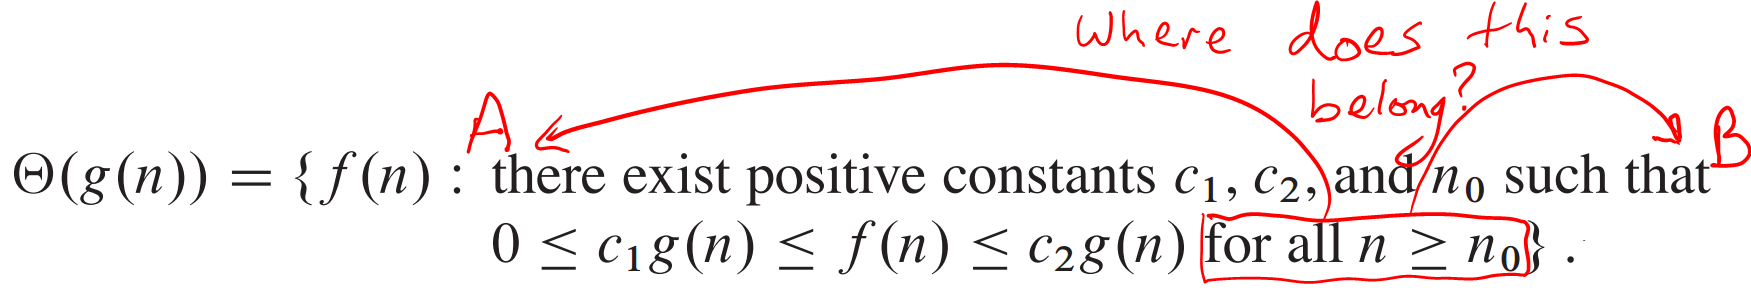

Do they mean:  
A. $\forall_{n\ge n_0}\exists_ {n_0,c_1,c_2>0}\ 0\le c_1g(n)\le f(n)\le c_2g(n)$, or  
B. $\exists_ {n_0,c_1,c_2>0} \forall_{n\ge n_0}\ 0\le c_1g(n)\le f(n)\le c_2g(n)$?

Are there hints from type or scope that you can use to disambiguate and choose correctly?

## Q6: What is the negation of big-O?  
When is  function $f\colon \mathbb{Z}^+ \to \mathbb{R}$ not in big-O of  $g\colon \mathbb{Z}^+ \to \mathbb{R}$: that is, $f(n)\not\in O\bigl(g(n)\bigr)$?  
Q6.1: Write down the negation of the definition in notation, using de Morgan's laws to push the negations down into the inequalities.  In addition, please state what your notation says in words.   
Q6.2: Using your negation from 5.2, complete a proof that $n\lg n \notin O(n)$.  

**Example (cont):**
* Prove that for any reals $1\le a< b$, function $a^n\in O(b^n)$, but $b^n\not\in O(a^n)$.  
   * Prove $a^n\in O(b^n)$: (Repeated from above) Given reals $1\le a < b$, I can choose $N=1,c=1$ to observe that $0\le a^n< b^n $, so $a^n\in O(b^n)$.
   * Prove $b^n\not\in O(a^n)$: I want to show that no matter what $c>0$ is given, I can find $n\ge N$ with $b^n\ge ca^n$, or $(b/a)^n \ge c$.  Since $b/a>1$, I can choose $n=\max(N,\left\lceil \log _ {b/a} c\right\rceil)$. Then $(b/a)^n > (b/a)^{ \log _{b/a} c} = c$, so $b^n\not\in O(a^n)$.


## Q7: Compare functions by big-$O$
Define two relations on functions that let us do comparisons:
* $f(n)\prec g(n)$ iff $f(n)\in O\bigl(g(n)\bigr)$
* $f(n)\approx g(n)$ iff both $f(n)\prec g(n)$ and $g(n) \prec f(n)$.  

Q7.1: Put the five loops of Q2.# into order by $\prec$ and $\approx$.  Your answer should be a permutation of 12345, with < or = interspersed, no spaces. For example, if you think they are all $\approx$, you'd answer 1=2=3=4=5, but if  you think the counts on n=3 give the right order, you'd answer 1<3<2<4<5.

Q7.2: Put the five loops of Q2.# into order by $\prec$ and $\approx$. (You need $\approx$ only once.) Your answer should be a permutation of 12345, with <,= interspersed, no spaces.

**Remark:** $\approx$ is actually an equivalence relation (reflexive, symmetric, and transitive).  If we take one representative from each set of equivalent functions, then $\prec$ becomes a partial order.

#### Timing loops
In case it helps, here are the timings for the loops of Q2,Q3, with both linear and log plots.   


In [ ]:
tester("one_loop",[10**5, 400000, 10**6, 4000000, 10**7],10)
tester("nested2",[10**2, 400, 10**3, 4000, 10**4],3)
tester("nested_ij",[10**2, 400, 10**3, 4000, 10**4],5)
tester("nested_ijk",[33, 60, 10**2, 300, 500],3)
tester("nested3",[33, 60, 10**2, 200, 300],2);

In [ ]:
tester("binary_count",[8,10,12,14,16,17,18],5)
tester("n_count",[4,5,6,7,8],2)
tester("nondecr_count",[6,7,8,9,10,11],2)
tester("i_count",[4,5,6,7,8,9],2)
tester("incr_count",[4,5,6,7,8,9,10],2);